# Important Note 

Flower classification model.   
it was a kaggle notebook. It runs without error on kaggle.   
Tried to run this on local machine, wsl/docker but had several issues related to model.   
Used wsl/docker//tensorflow-gpu/jupyter server from colab to connect as local machine.   
Then ran this notebook. it works perfectly fine now.   
Accuracy is 90%


In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil


In [56]:
ls /kaggle

input/  working/


In [54]:
!ls $KAGGLE_INPUT_PATH

flowers-recognition  mobilenet-v2


In [2]:
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'flowers-recognition:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F8782%2F2431805%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240913%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240913T091217Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D079054da38d349bbbdf5357b3aeacc17ec22395b7306ccfae15ed8f8bed84bcd8a0da99d110b3144257fb74f3addf42717fa640259734fa42a244b91f02963db3d19c14974c34be609bd7252b30c723f360b9bef3089f73bcf936191d92957a216f21cacd3d5087ffedd1b6ca6a0400aa8cc8ce7e1f48ab74b53d9df4cd78960c73c8bd5e66019de290fcbb63fb85a0e7596cbf2b1539610454e3b99a5346454aa09f97d55f508822697151a2f9672465c1ffbcb479dc3b1ea1fdf8502c4d2d7f2de5696d120f103332d7264a0dc6887e6fc2916b83fb7d980c2fb8cc88619932e3aa6418cea8955b2b4f9b026b209547da36a7b4b074a28a4af5ba580eb10b5,mobilenet-v2/tensorflow2/140-224-classification/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2610%2F3676%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240913%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240913T091217Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D04142946444d86b6924a0a75af93dbc6e9f40ab3b1359b17cea86dc5e6dd4e8b94eeaf83001f23b81dd1f9113779431db08dfc1881f8d247150ff5d45007814d7048d58ae136047f3a8bb864f0e6cdf2f6e29cd7901a1d8e8bad3c37de1b4ebcce76f5be3bf866e311a65f7c267d70af139031ee3cdec3ff5b08b05ca41d55e3f8c6ae273cd40bc2da8c696fd3d7ddb231dceb610336e9bc61da1c5ad44bb4e6614b9e896a702378bdf90990a984e17f4e42e18666daf1b9f31051743b31c19fd1dd4b7748299d926c56f461e217d0884f39b4bf4853d3ca3b4d5029100a9ee2acf5c49c4682e20063300ed32721e8a86ca2d989f2567551ad0d82615f5908fa'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass


try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass





## Code above does following
This Colab Python code snippet performs the following operations:

Defines Constants:

CHUNK_SIZE is set to 40960, which is a common buffer size used for reading data in chunks.

DATA_SOURCE_MAPPING is a long string containing URLs for downloading datasets and models from Google Cloud Storage. The URLs are for flower recognition data and a MobileNet V2 TensorFlow model.

Sets Up Directory Paths:

KAGGLE_INPUT_PATH is defined as '/kaggle/input', which is where Kaggle datasets are usually stored in the environment.

KAGGLE_WORKING_PATH is defined as '/kaggle/working', which is the default working directory on Kaggle.

KAGGLE_SYMLINK is set to 'kaggle', although it’s not used later in this snippet.
Unmounts and Recreates Directories:

The code attempts to unmount the /kaggle/input/ directory using umount. This is to ensure that any existing mounts are removed.

It then deletes the /kaggle/input directory using shutil.rmtree() to remove any residual files or directories.

The script creates new directories for KAGGLE_INPUT_PATH and KAGGLE_WORKING_PATH with full permissions (0o777).

Creates Symbolic Links:

It attempts to create symbolic links from KAGGLE_INPUT_PATH to a directory named input one level up in the file structure. This is done using os.symlink(). If the link already exists, it will skip creating it (due to the FileExistsError exception handling).

It similarly creates a symbolic link from KAGGLE_WORKING_PATH to a directory named working one level up.

Summary
This code sets up the environment by clearing out and recreating necessary directories and creating symbolic links to these directories, which might be used for accessing input data and saving outputs in a consistent manner. The DATA_SOURCE_MAPPING string is prepared for potential future use, such as downloading and accessing datasets or models.

In [3]:
for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 235663188 bytes downloaded
Downloaded and uncompressed: flowers-recognition
[==================================================] 23037977 bytes downloaded
Downloaded and uncompressed: mobilenet-v2/tensorflow2/140-224-classification/2
Data source import complete.


# Image Classification with Google MobileNetV2

## Import Libraries

In [5]:
!nvidia-smi

Fri Sep 13 09:27:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.31.01              Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   56C    P8              2W /   80W |    7834MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [93]:
# Kinds of flowers
kinds = np.array(os.listdir('/kaggle/input/flowers-recognition/flowers'))
print(f"Flower kinds in this dataset: {kinds}")

Flower kinds in this dataset: ['rose' 'dandelion' 'daisy' 'sunflower' 'tulip']


In [94]:
# Paths of directories
path = '/kaggle/input/flowers-recognition/flowers'
kind_path = [path + "/" + flower for flower in kinds]
kind_path

['/kaggle/input/flowers-recognition/flowers/rose',
 '/kaggle/input/flowers-recognition/flowers/dandelion',
 '/kaggle/input/flowers-recognition/flowers/daisy',
 '/kaggle/input/flowers-recognition/flowers/sunflower',
 '/kaggle/input/flowers-recognition/flowers/tulip']

In [9]:
# Numbers of flowers for each kinds
for i, kind in enumerate(kind_path):
    print(f"There are {len(os.listdir(kind))} flowers in {kinds[i]}")

There are 784 flowers in rose
There are 1052 flowers in dandelion
There are 764 flowers in daisy
There are 733 flowers in sunflower
There are 984 flowers in tulip


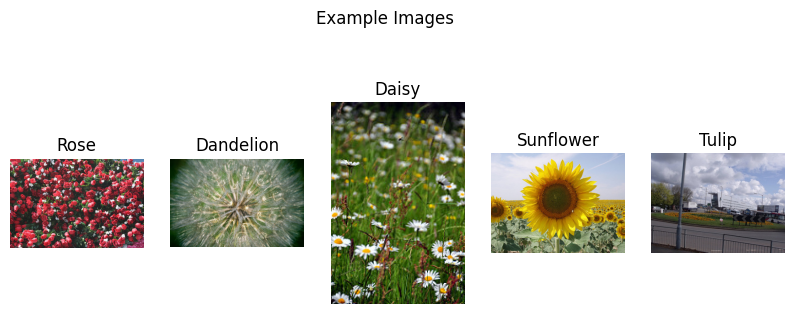

In [10]:
# Example images for each kinds
plt.figure(figsize=(10,4))
plt.suptitle("Example Images")
for i, kind in enumerate(kinds):
    ax = plt.subplot(1, 5, i+1)
    path = kind_path[i] + "/" + os.listdir(kind_path[i])[0]
    img = plt.imread(path)
    plt.imshow(img)
    plt.title(kind.capitalize())
    plt.axis("off")

In [95]:
# All ids
id_df = []
for i in range(len(kinds)):
    id = [img.split(".")[0] for img in os.listdir(kind_path[i])]
    id_df = id_df + id
len(id_df)

4317

In [96]:
# All kinds
kind_df = []
for i, kind in enumerate(kinds):
    for x in range(len(os.listdir(kind_path[i]))):
        kind_df.append(kind)
len(kind_df)

4317

In [13]:
# Create a dataframe
df = pd.DataFrame(columns=["id", "kind"])
df["id"] = id_df
df["kind"] = kind_df
df.tail()

,id,kind
4312,13197345653_0f685b3c97_n,tulip
4313,8712270665_57b5bda0a2_n,tulip
4314,7166546934_c97b08c9d9_n,tulip
4315,8586205946_cda045f3f8_n,tulip
4316,16754984282_3a801bfa50_n,tulip


In [14]:
# Check numbers
df["kind"].value_counts()

kind
dandelion    1052
tulip         984
rose          784
daisy         764
sunflower     733
Name: count, dtype: int64

In [15]:
filenames = []
for i in range(len(kinds)):
    file = [kind_path[i] + "/" + kind for kind in os.listdir(kind_path[i])]
    filenames = filenames + file
filenames[:5]

['/kaggle/input/flowers-recognition/flowers/rose/3971662839_5cb2963b20_n.jpg',
 '/kaggle/input/flowers-recognition/flowers/rose/2609353769_dc3654f12f.jpg',
 '/kaggle/input/flowers-recognition/flowers/rose/4612766755_7d3f047db0_n.jpg',
 '/kaggle/input/flowers-recognition/flowers/rose/16374919860_4e445de29f_n.jpg',
 '/kaggle/input/flowers-recognition/flowers/rose/8035908422_87220425d2_n.jpg']

In [16]:
# Check a random flower
print(filenames[2317])
print(df.loc[2317])

/kaggle/input/flowers-recognition/flowers/daisy/3275951182_d27921af97_n.jpg
id      3275951182_d27921af97_n
kind                      daisy
Name: 2317, dtype: object


In [97]:
kind_df[800]

'dandelion'

In [70]:
kinds

array(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], dtype='<U9')

In [81]:
kind_df[800]==kinds


array([False,  True, False, False, False])

In [17]:
boolean_kinds = [kind == kinds for kind in kind_df]
boolean_kinds[:5]

[array([ True, False, False, False, False]),
 array([ True, False, False, False, False]),
 array([ True, False, False, False, False]),
 array([ True, False, False, False, False]),
 array([ True, False, False, False, False])]

## Creating test and train sets

In [98]:
X = filenames
y = boolean_kinds

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)
len(X_train), len(X_test), len(y_train), len(y_test)

(3453, 864, 3453, 864)

In [100]:
X_train[:3], y_train[:3]

(['/home/project/mobilenet-v2/flowers/dandelion/62293290_2c463891ff_m.jpg',
  '/home/project/mobilenet-v2/flowers/sunflower/5937914300_bfca430439_n.jpg',
  '/home/project/mobilenet-v2/flowers/sunflower/14889779907_3d401bbac7_m.jpg'],
 [array([False,  True, False, False, False]),
  array([False, False, False,  True, False]),
  array([False, False, False,  True, False])])

## Preprocessing Images

In [21]:
image = imread(filenames[15])
image.shape

(333, 500, 3)

In [22]:
image.max(), image.min()

(255, 0)

In [23]:
image[:2]

array([[[ 77,  92,  87],
        [ 70,  82,  78],
        [ 57,  70,  63],
        ...,
        [154, 112, 136],
        [158, 122, 136],
        [160, 131, 135]],

       [[ 91, 106, 103],
        [ 81,  96,  93],
        [ 66,  81,  76],
        ...,
        [146,  97, 129],
        [148, 104, 127],
        [150, 112, 125]]], dtype=uint8)

In [24]:
# turn image into a tensor
tf.constant(image)[:2]

I0000 00:00:1726219727.438305    1059 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726219727.471372    1059 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726219727.471462    1059 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726219727.473408    1059 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726219727.473434    1059 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 77,  92,  87],
        [ 70,  82,  78],
        [ 57,  70,  63],
        ...,
        [154, 112, 136],
        [158, 122, 136],
        [160, 131, 135]],

       [[ 91, 106, 103],
        [ 81,  96,  93],
        [ 66,  81,  76],
        ...,
        [146,  97, 129],
        [148, 104, 127],
        [150, 112, 125]]], dtype=uint8)>

In [25]:
img_size = 224

In [111]:
# Read in an image file
a = tf.io.read_file(X[10])

# # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
a = tf.image.decode_jpeg(a, channels=3)
a


<tf.Tensor: shape=(240, 240, 3), dtype=uint8, numpy=
array([[[24, 24, 24],
        [25, 25, 25],
        [26, 26, 26],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [31, 31, 31]],

       [[24, 24, 24],
        [25, 25, 25],
        [26, 26, 26],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [32, 32, 32]],

       [[25, 25, 25],
        [25, 25, 25],
        [27, 27, 27],
        ...,
        [32, 32, 32],
        [31, 31, 31],
        [33, 33, 33]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)>

In [116]:
# # Convert the colour channel values from 0-255 to 0-1 values
a = tf.image.convert_image_dtype(a, tf.float32)
a

<tf.Tensor: shape=(240, 240, 3), dtype=float32, numpy=
array([[[0.09411766, 0.09411766, 0.09411766],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10196079, 0.10196079, 0.10196079],
        ...,
        [0.11764707, 0.11764707, 0.11764707],
        [0.11764707, 0.11764707, 0.11764707],
        [0.12156864, 0.12156864, 0.12156864]],

       [[0.09411766, 0.09411766, 0.09411766],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10196079, 0.10196079, 0.10196079],
        ...,
        [0.12156864, 0.12156864, 0.12156864],
        [0.12156864, 0.12156864, 0.12156864],
        [0.1254902 , 0.1254902 , 0.1254902 ]],

       [[0.09803922, 0.09803922, 0.09803922],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10588236, 0.10588236, 0.10588236],
        ...,
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.12156864, 0.12156864, 0.12156864],
        [0.12941177, 0.12941177, 0.12941177]],

       ...,

       [[0.05882353, 0.05882353, 0.05882353],
        [0.05

In [117]:
# # Resize the image to our desired value (224, 224)
a = tf.image.resize(a, size=[img_size, img_size])
a

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.09425771, 0.09425771, 0.09425771],
        [0.09845939, 0.09845939, 0.09845939],
        [0.10266107, 0.10266107, 0.10266107],
        ...,
        [0.11848741, 0.11848741, 0.11848741],
        [0.11778712, 0.11778712, 0.11778712],
        [0.12156861, 0.12156861, 0.12156861]],

       [[0.09466287, 0.09466287, 0.09466287],
        [0.09850441, 0.09850441, 0.09850441],
        [0.10300621, 0.10300621, 0.10300621],
        ...,
        [0.12268909, 0.12268909, 0.12268909],
        [0.12161365, 0.12161365, 0.12161365],
        [0.12575528, 0.12575528, 0.12575528]],

       [[0.09806424, 0.09806424, 0.09806424],
        [0.09950481, 0.09950481, 0.09950481],
        [0.10600741, 0.10600741, 0.10600741],
        ...,
        [0.1261905 , 0.1261905 , 0.1261905 ],
        [0.12261406, 0.12261406, 0.12261406],
        [0.12915663, 0.12915663, 0.12915663]],

       ...,

       [[0.05882353, 0.05882353, 0.05882353],
        [0.05

In [ ]:
tf.image.convert_image_dtype(image, tf.float32)

In [26]:
# Create a function for preprocessing images
def process_image(image_path, img_size=img_size):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

In [27]:
process_image(X[17]), tf.constant(y[17])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.01162465, 0.01162465, 0.01162465],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00406165, 0.00014008]],
 
        [[0.00895733, 0.00895733, 0.00895733],
         [0.00754677, 0.00754677, 0.00754677],
         [0.00557098, 0.00557098, 0.00557098],
         ...,
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00672895, 0.00280738]],
 
        [[0.00784314, 0.00784314, 0.00784314],
         [0.00742297, 0.00742297, 0.00742297],
         [0.00426546, 0.00426546, 0.00426546],
         ...,
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00784314, 0.00392157]],
 
        ...,
 
        [[0.00014006, 0.00392157

## Creating data batches

In [28]:
# Create a simple function to return a tuple (image, label)
def get_image_label (image_path, label):
  image = process_image(image_path)
  return image, label

In [29]:
batch_size = 32

In [30]:
# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=batch_size, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch
    else:
        print("Creating data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(batch_size)
        return data_batch

In [31]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
test_data = create_data_batches(X_test, test_data=True)

Creating data batches...
Creating test data batches...


In [32]:
train_data.element_spec, test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.bool, name=None)),
 TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None))

In [33]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images[:2], train_labels[:2]

(array([[[[1.08403370e-01, 1.55322134e-01, 7.42797181e-03],
          [6.59513846e-02, 1.08668476e-01, 0.00000000e+00],
          [6.30001947e-02, 1.02215886e-01, 4.17666603e-03],
          ...,
          [3.88095289e-01, 4.16246563e-01, 1.37255173e-02],
          [3.84468853e-01, 4.18797553e-01, 8.12326744e-03],
          [3.80117089e-01, 4.30397123e-01, 1.54011091e-02]],
 
         [[1.13025218e-01, 1.60364151e-01, 3.37635097e-03],
          [7.01230541e-02, 1.13260314e-01, 0.00000000e+00],
          [6.25950396e-02, 1.02155864e-01, 3.42636672e-03],
          ...,
          [3.84388804e-01, 4.12044883e-01, 1.06342779e-02],
          [3.76935840e-01, 4.07843202e-01, 5.55723812e-03],
          [3.66866827e-01, 4.13365334e-01, 1.49058979e-02]],
 
         [[1.22128859e-01, 1.73644468e-01, 0.00000000e+00],
          [7.87765086e-02, 1.25415176e-01, 0.00000000e+00],
          [6.59964010e-02, 1.08308330e-01, 2.42596818e-03],
          ...,
          [3.85014057e-01, 4.08543468e-01, 1.7537

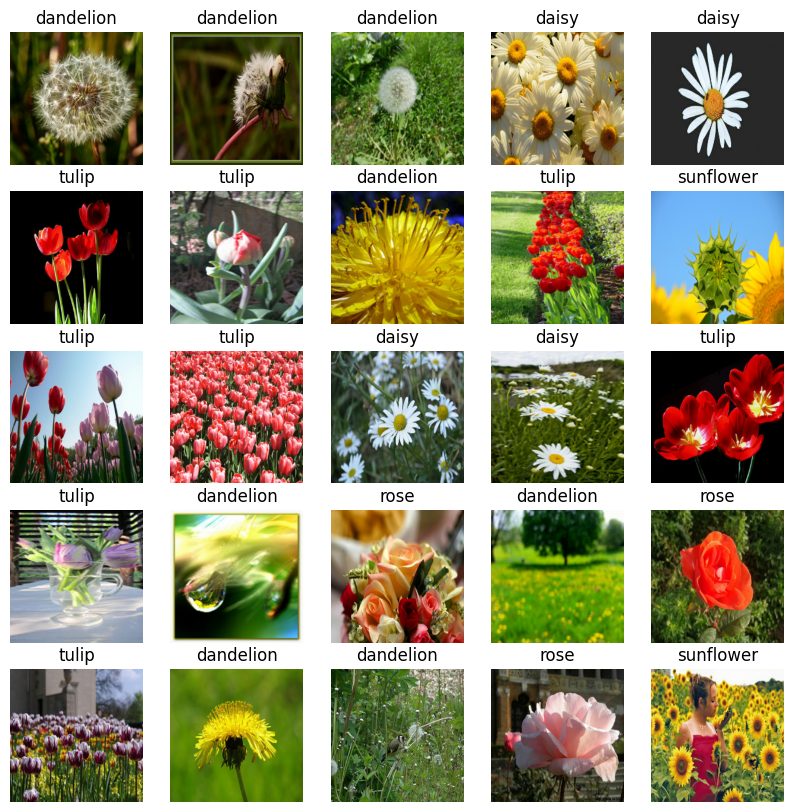

In [34]:
# Visualizing data batches
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(kinds[train_labels[i].argmax()])
    plt.axis("off")

## Model

In [35]:
# Setup input shape to the model
input_shape = [None, img_size, img_size, 3] # batch, height, width, colour channels

# Setup output shape of our model
output_shape = len(kinds)

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

# Define the input shape based on your data
input_shape = [None, 224, 224, 3]

# Create an input layer
inputs = tf.keras.Input(shape=input_shape[1:])

# Load the TensorFlow Hub model
hub_layer = hub.KerasLayer("/kaggle/input/mobilenet-v2/tensorflow2/140-224-classification/2", trainable=False)

# Define a lambda function to use the Hub layer
def hub_layer_fn(inputs):
    return hub_layer(inputs)

# Apply the lambda function
x = tf.keras.layers.Lambda(hub_layer_fn)(inputs)

# Add a Dense output layer
outputs = tf.keras.layers.Dense(units=output_shape, activation="softmax")(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [97]:
#@title Test function
# Load the TensorFlow Hub model
fn = lambda x: [y**2 for y in x]

# Define a lambda function to use the Hub layer
def fn1(inp):
  inp= inp * 2
  return fn(inp)

# Apply the lambda function
inp = [4, 2,8]
fn1(inp)



[16, 4, 64, 16, 4, 64]

In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub

# # Define the input shape based on your data
# input_shape = [None, 224, 224, 3]

# # Create an input layer
# inputs = tf.keras.Input(shape=input_shape[1:])

# # Load the TensorFlow Hub model
# hub_layer = hub.KerasLayer("/kaggle/input/mobilenet-v2/tensorflow2/140-224-classification/2", trainable=False)

# # Pass the input through the hub layer
# x = hub_layer(inputs)

# # Add a Dense output layer
# outputs = tf.keras.layers.Dense(units=output_shape, activation="softmax")(x)

# # Create the model
# model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
# model = tf.keras.Sequential([
#     hub.KerasLayer("/kaggle/input/mobilenet-v2/tensorflow2/140-224-classification/2"), #input layer
#     tf.keras.layers.Dense(units=output_shape,
#                           activation="softmax") # output layer
# ])

In [37]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

In [ ]:
# !pip install kagglehub

In [38]:
import kagglehub
kagglehub.model_download('google/mobilenet-v2/TensorFlow2/140-224-classification/2')

'/root/.cache/kagglehub/models/google/mobilenet-v2/TensorFlow2/140-224-classification/2'

In [39]:
model.build(input_shape)

In [40]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,010 (19.57 KB)

 Trainable params: 5,010 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)

In [42]:
model.fit(x=train_data,
            epochs=150,
            callbacks=[early_stopping])

Epoch 1/150


I0000 00:00:1726219772.139055    1165 service.cc:146] XLA service 0x7fa9c8012280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726219772.139607    1165 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-09-13 09:29:32.233740: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-13 09:29:32.593282: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


  7/108 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2348 - loss: 2.3667

I0000 00:00:1726219779.081337    1165 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.5995 - loss: 1.1289
Epoch 2/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8957 - loss: 0.3180
Epoch 3/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9088 - loss: 0.2693
Epoch 4/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9382 - loss: 0.1943
Epoch 5/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9411 - loss: 0.1839
Epoch 6/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9504 - loss: 0.1521
Epoch 7/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9589 - loss: 0.1391
Epoch 8/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9659 - loss: 0.1342
Epoch 9/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9670 - loss: 0.1218
Epoch 10/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9732 - loss: 0.1013
Epoch 11/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9743 - loss: 0.0974
Epoch 12/150
108/108 ━━━━━━━━━━━━━━━━━━━━

## Predictions

In [ ]:
type(test_data)

tensorflow.python.data.ops.batch_op._BatchDataset

In [45]:
predictions = model.predict(test_data)
predictions

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


array([[1.44578365e-07, 7.97789426e-07, 9.99995112e-01, 1.40864955e-07,
        3.83680299e-06],
       [5.42326961e-05, 6.24472818e-07, 9.99767244e-01, 5.92346914e-05,
        1.18650241e-04],
       [4.19484142e-10, 9.99997973e-01, 2.00674845e-06, 1.08943228e-08,
        5.52056356e-09],
       ...,
       [1.90489936e-05, 1.57066999e-08, 1.30205027e-10, 9.99977708e-01,
        3.25070368e-06],
       [1.04130895e-05, 6.12399131e-02, 7.19228865e-06, 7.88976252e-01,
        1.49766222e-01],
       [5.57670967e-12, 1.00000000e+00, 1.91389979e-08, 2.16062047e-11,
        8.02858613e-10]], dtype=float32)

In [46]:
true_labels = [kinds[np.argmax(data)] for data in y_test]
pred_labels = [kinds[np.argmax(pred)] for pred in predictions]

In [49]:
true_labels[:5]

['daisy', 'daisy', 'dandelion', 'rose', 'sunflower']

In [47]:
pred_labels[:5]

['daisy', 'daisy', 'dandelion', 'rose', 'tulip']

In [48]:
print(accuracy_score(true_labels, pred_labels))

0.9004629629629629


In [77]:
model.save("flowers_model")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=flowers_model.

## References

* https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-4-unstructured-data-projects/end-to-end-dog-vision-video.ipynb